In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint #모델을 저장하기 위해 케라스의 콜백함수 중 ModelCheckpoint함수를 불러옴.
from tensorflow.keras.callbacks import EarlyStopping
#콜백함수
# : 메인프로그램이 돌아가면서 또 다른 프로세스를 가동시키는 것.(스레드라고 표현하기도 함.)
#   Non Block방식 
#   Non Block방식 : 호출이 있기 전까지 자신이 맡은 일을 계속한다는 것.


#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#시드값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df_pre =pd.read_csv("C:/sourceTree/DataScience/ICT/Py_Project/20201204_day35/wine.csv",header=None)
df = df_pre.sample(frac=1)#frac=1 : frac=1 원본데이터 100%를 불러온다, 

#데이터 셋을 구성. 학습셋 검증셋 않음.
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
model = Sequential()

#조건1 : 4개의 은닉층 생성 30,12,8,1(선생님이 정한 임의의 값들임.)
model.add(Dense(30, input_dim=12,activation='relu' ))#히든레이어, 인풋(input_dim), 
model.add(Dense(12,  activation='relu' ) ) #Dense를 이용하여 각 모델을 설정.
model.add(Dense(8,  activation='relu' ) )
model.add(Dense(1,  activation='sigmoid' ) )

In [5]:
#조건2 : binary_crossentropy, adam 사용
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [6]:
#이 부분부터 12월 4일과는 달라진다.=============================

#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=100)
#monitor = 'val_loss' :val_loss의 값을 기준으로 해서 멈춤여부를 정하겠어.(횟수는 patience에서 설정)
# patience=100 : 100번까지는 오차가 줄지 않아도 봐줄게. 하지만 101번 째에도 오차가 안줄면 학습을 멈출거야!

#모델 저장 조건 설정.
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

#모델 저장조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5" #파일저장경로 & 저장형식까지 설정.

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 
# checkpointer변수 : 모니터할 값을 지정하는 변수.
#ModelCheckpoint는 계속 감독자처럼 계속 체크 및 기록만 하고 있다.
#  save_best_only=True 옵션 : epochs 수만큼 저장하는게 아니라, 개선점이 보인 순간의 값들을 저장하는 식으로 의미 있는 값들만 저장하는 식으.


#모델 실행
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, callbacks=[early_stopping_callback, checkpointer]) 



Epoch 1/3500
 1/11 [=>............................] - ETA: 0s - loss: 1.0005 - accuracy: 0.7240
Epoch 00001: val_loss improved from inf to 0.36834, saving model to ./model\01-0.3683.hdf5
11/11 [==============================] - 0s 14ms/step - loss: 0.5371 - accuracy: 0.7679 - val_loss: 0.3683 - val_accuracy: 0.8715
Epoch 2/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8460
Epoch 00002: val_loss improved from 0.36834 to 0.29392, saving model to ./model\02-0.2939.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8769 - val_loss: 0.2939 - val_accuracy: 0.8923
Epoch 3/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.3246 - accuracy: 0.8780
Epoch 00003: val_loss improved from 0.29392 to 0.27416, saving model to ./model\03-0.2742.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8901 - val_loss: 0.2742 - val_accuracy: 0.9146
Epoch 4/3500
 1/11 [=>.....................

Epoch 27/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1513 - accuracy: 0.9520
Epoch 00027: val_loss improved from 0.18023 to 0.17735, saving model to ./model\27-0.1774.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9398 - val_loss: 0.1774 - val_accuracy: 0.9362
Epoch 28/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1508 - accuracy: 0.9520
Epoch 00028: val_loss did not improve from 0.17735
11/11 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9402 - val_loss: 0.1812 - val_accuracy: 0.9362
Epoch 29/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1995 - accuracy: 0.9260
Epoch 00029: val_loss improved from 0.17735 to 0.17698, saving model to ./model\29-0.1770.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.9390 - val_loss: 0.1770 - val_accuracy: 0.9346
Epoch 30/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1821 - a

Epoch 54/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9580
Epoch 00054: val_loss improved from 0.13914 to 0.13509, saving model to ./model\54-0.1351.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.1321 - accuracy: 0.9509 - val_loss: 0.1351 - val_accuracy: 0.9469
Epoch 55/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1344 - accuracy: 0.9400
Epoch 00055: val_loss improved from 0.13509 to 0.13317, saving model to ./model\55-0.1332.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9519 - val_loss: 0.1332 - val_accuracy: 0.9477
Epoch 56/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1233 - accuracy: 0.9580
Epoch 00056: val_loss improved from 0.13317 to 0.13272, saving model to ./model\56-0.1327.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 0.9521 - val_loss: 0.1327 - val_accuracy: 0.9477
Epoch 57/3500
 1/11 [=>..............

 1/11 [=>............................] - ETA: 0s - loss: 0.1061 - accuracy: 0.9520
Epoch 00080: val_loss did not improve from 0.10153
11/11 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9663 - val_loss: 0.1019 - val_accuracy: 0.9638
Epoch 81/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1129 - accuracy: 0.9660
Epoch 00081: val_loss did not improve from 0.10153
11/11 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9684 - val_loss: 0.1017 - val_accuracy: 0.9638
Epoch 82/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1179 - accuracy: 0.9620
Epoch 00082: val_loss improved from 0.10153 to 0.09887, saving model to ./model\82-0.0989.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9684 - val_loss: 0.0989 - val_accuracy: 0.9615
Epoch 83/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0740 - accuracy: 0.9780
Epoch 00083: val_loss improved from 0.0988

 1/11 [=>............................] - ETA: 0s - loss: 0.0765 - accuracy: 0.9720
Epoch 00107: val_loss improved from 0.08428 to 0.08375, saving model to ./model\107-0.0837.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9754 - val_loss: 0.0837 - val_accuracy: 0.9700
Epoch 108/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.1114 - accuracy: 0.9680
Epoch 00108: val_loss improved from 0.08375 to 0.08349, saving model to ./model\108-0.0835.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9744 - val_loss: 0.0835 - val_accuracy: 0.9754
Epoch 109/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0557 - accuracy: 0.9840
Epoch 00109: val_loss improved from 0.08349 to 0.08164, saving model to ./model\109-0.0816.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9756 - val_loss: 0.0816 - val_accuracy: 0.9723
Epoch 110/3500
 1/11 [=>......................

Epoch 00134: val_loss did not improve from 0.07104
11/11 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9794 - val_loss: 0.0721 - val_accuracy: 0.9762
Epoch 135/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0468 - accuracy: 0.9860
Epoch 00135: val_loss did not improve from 0.07104
11/11 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9792 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 136/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0749 - accuracy: 0.9740
Epoch 00136: val_loss improved from 0.07104 to 0.06907, saving model to ./model\136-0.0691.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.0740 - accuracy: 0.9796 - val_loss: 0.0691 - val_accuracy: 0.9785
Epoch 137/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0712 - accuracy: 0.9820
Epoch 00137: val_loss did not improve from 0.06907
11/11 [==============================] - 0s 2ms/step - loss: 0.0739 - 

Epoch 162/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0813 - accuracy: 0.9800
Epoch 00162: val_loss improved from 0.06149 to 0.06104, saving model to ./model\162-0.0610.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9811 - val_loss: 0.0610 - val_accuracy: 0.9808
Epoch 163/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0518 - accuracy: 0.9800
Epoch 00163: val_loss did not improve from 0.06104
11/11 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9817 - val_loss: 0.0643 - val_accuracy: 0.9792
Epoch 164/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0822 - accuracy: 0.9740
Epoch 00164: val_loss did not improve from 0.06104
11/11 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9788 - val_loss: 0.0631 - val_accuracy: 0.9800
Epoch 165/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0389 - accuracy: 0.9860
Epoch 00165: val_loss d

 1/11 [=>............................] - ETA: 0s - loss: 0.0607 - accuracy: 0.9780
Epoch 00190: val_loss did not improve from 0.05715
11/11 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.0580 - val_accuracy: 0.9831
Epoch 191/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0580 - accuracy: 0.9780
Epoch 00191: val_loss did not improve from 0.05715
11/11 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 192/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0508 - accuracy: 0.9760
Epoch 00192: val_loss did not improve from 0.05715
11/11 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9804 - val_loss: 0.0575 - val_accuracy: 0.9831
Epoch 193/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0562 - accuracy: 0.9820
Epoch 00193: val_loss did not improve from 0.05715
11/11 [=========================

 1/11 [=>............................] - ETA: 0s - loss: 0.0617 - accuracy: 0.9880
Epoch 00219: val_loss did not improve from 0.05417
11/11 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9838 - val_loss: 0.0571 - val_accuracy: 0.9862
Epoch 220/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0934 - accuracy: 0.9780
Epoch 00220: val_loss did not improve from 0.05417
11/11 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.0565 - val_accuracy: 0.9846
Epoch 221/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0388 - accuracy: 0.9880
Epoch 00221: val_loss did not improve from 0.05417
11/11 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9840 - val_loss: 0.0583 - val_accuracy: 0.9831
Epoch 222/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0733 - accuracy: 0.9840
Epoch 00222: val_loss did not improve from 0.05417
11/11 [=========================

Epoch 249/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0438 - accuracy: 0.9840
Epoch 00249: val_loss did not improve from 0.05417
11/11 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0605 - val_accuracy: 0.9815
Epoch 250/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0786 - accuracy: 0.9800
Epoch 00250: val_loss improved from 0.05417 to 0.05381, saving model to ./model\250-0.0538.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 0.9838 - val_loss: 0.0538 - val_accuracy: 0.9846
Epoch 251/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0478 - accuracy: 0.9900
Epoch 00251: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9846 - val_loss: 0.0539 - val_accuracy: 0.9877
Epoch 252/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0452 - accuracy: 0.9920
Epoch 00252: val_loss d

 1/11 [=>............................] - ETA: 0s - loss: 0.0445 - accuracy: 0.9880
Epoch 00278: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9871 - val_loss: 0.0586 - val_accuracy: 0.9869
Epoch 279/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0489 - accuracy: 0.9840
Epoch 00279: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0554 - val_accuracy: 0.9838
Epoch 280/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0825 - accuracy: 0.9800
Epoch 00280: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9865 - val_loss: 0.0574 - val_accuracy: 0.9862
Epoch 281/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0411 - accuracy: 0.9960
Epoch 00281: val_loss did not improve from 0.05381
11/11 [=========================

Epoch 00307: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9871 - val_loss: 0.0566 - val_accuracy: 0.9846
Epoch 308/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0346 - accuracy: 0.9880
Epoch 00308: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0542 - val_accuracy: 0.9846
Epoch 309/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0525 - accuracy: 0.9840
Epoch 00309: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9873 - val_loss: 0.0565 - val_accuracy: 0.9862
Epoch 310/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0382 - accuracy: 0.9900
Epoch 00310: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9883 - val_loss: 0.0557 - val_acc

Epoch 337/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0219 - accuracy: 0.9920
Epoch 00337: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9877 - val_loss: 0.0565 - val_accuracy: 0.9854
Epoch 338/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0706 - accuracy: 0.9840
Epoch 00338: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9861 - val_loss: 0.0553 - val_accuracy: 0.9854
Epoch 339/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0276 - accuracy: 0.9960
Epoch 00339: val_loss did not improve from 0.05381
11/11 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0553 - val_accuracy: 0.9854
Epoch 340/3500
 1/11 [=>............................] - ETA: 0s - loss: 0.0244 - accuracy: 0.9920
Epoch 00340: val_loss did not improve from 0.05381
11/11 [==========

In [9]:
#결과를 출력합니다.
print("\n loss : %.4f,  Accuracy : %.4f" %(model.evaluate(X,Y)[0], model.evaluate(X,Y)[1]))

204/204 [==============================] - 0s 455us/step - loss: 0.0592 - accuracy: 0.9825

 loss : 0.0592,  Accuracy : 0.9825


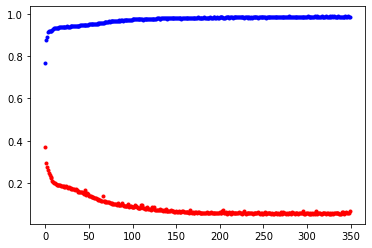

In [8]:
#1교시 그래프로 표현하기 사용 =============================
#y_vloss에 테스트셋으로 실험 결과의 오차값을 저장한다.
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정할 정확도의 값을 저장.
y_acc = history.history['accuracy']
#x값을 지정하고 정확도는 파란색 / 오차는 빨간색 으로 표현.
x_len = np.arange(len(y_acc)) #x축 길이를 설정하기 위해 실시.
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()
    
#모델 실행 및 저장
#model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer]) 